# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

In [6]:
reg1 = smf.ols('tip ~ size + net_bill', data = tips).fit()
reg2 = smf.ols('tip ~ size + np.log(net_bill)', data = tips).fit()
reg3 = smf.ols('tip ~ size + np.power(net_bill,2)', data = tips).fit()

In [8]:
tips['res_log1'] = reg1.resid
tips['res_log2'] = reg2.resid
tips['res_log3'] = reg3.resid

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     70.44
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           8.15e-25
Time:                        17:22:35   Log-Likelihood:                -368.79
No. Observations:                 244   AIC:                             743.6
Df Residuals:                     241   BIC:                             754.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8479      0.209      4.057      0.000       0.436       1.260
size           0.3402      0.091      3.727      0.000       0.160       0.520
net_bill       0.0760      0.011      7.032      0.000       0.055       0.097
==============================================================================
Omnibus:                       43.472   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.448
Skew:                           0.887   Prob(JB):                     6.22e-20
Kurtosis:                       5.356   Cond. No.                         57.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     63.02
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           9.66e-23
Time:                        17:22:43   Log-Likelihood:                -373.63
No. Observations:                 244   AIC:                             753.3
Df Residuals:                     241   BIC:                             763.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.0708      0.418     -2.562      0.011      -1.894      -0.247
size                 0.3903      0.092      4.239      0.000       0.209       0.572
np.log(net_bill)     1.1308      0.183      6.178      0.000       0.770       1.491
==============================================================================
Omnibus:                       74.760   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.807
Skew:                           1.295   Prob(JB):                     6.24e-52
Kurtosis:                       7.060   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     66.10
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           1.30e-23
Time:                        17:22:49   Log-Likelihood:                -371.60
No. Observations:                 244   AIC:                             749.2
Df Residuals:                     241   BIC:                             759.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.4309      0.210      6.810      0.000       1.017       1.845
size                      0.3987      0.089      4.469      0.000       0.223       0.574
np.power(net_bill, 2)     0.0016      0.000      6.546      0.000       0.001       0.002
==============================================================================
Omnibus:                       33.294   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.075
Skew:                           0.778   Prob(JB):                     1.81e-12
Kurtosis:                       4.701   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

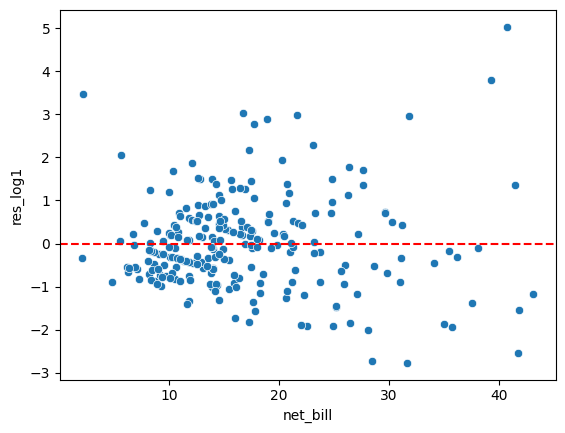

In [11]:
sns.scatterplot(x = 'net_bill', y = 'res_log1', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [21]:
results = smf.ols('''
                    tip_pct ~       sex 
                                + size
                                + smoker
                                + time 
                                + net_bill
                  ''', tips).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     6.512
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           1.07e-05
Time:                        17:28:59   Log-Likelihood:                 111.97
No. Observations:                 244   AIC:                            -211.9
Df Residuals:                     238   BIC:                            -190.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2929      0.036      8.074      0.000       0.221       0.364
sex[T.Female]     -0.0069      0.021     -0.325      0.746      -0.049       0.035
smoker[T.No]      -0.0444      0.021     -2.103      0.037      -0.086      -0.003
time[T.Dinner]     0.0218      0.023      0.954      0.341      -0.023       0.067
size               0.0250      0.013      1.902      0.058      -0.001       0.051
net_bill          -0.0084      0.002     -5.336      0.000      -0.011      -0.005
==============================================================================
Omnibus:                      461.365   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           216987.945
Skew:                          10.760   Prob(JB):                         0.00
Kurtosis:                     147.499   Cond. No.                         75.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
results = smf.ols('''
                    tip_pct ~       size
                                + smoker
                                + net_bill
                  ''', tips).fit()

results.summary()
tips['result_resid'] = results.resid 

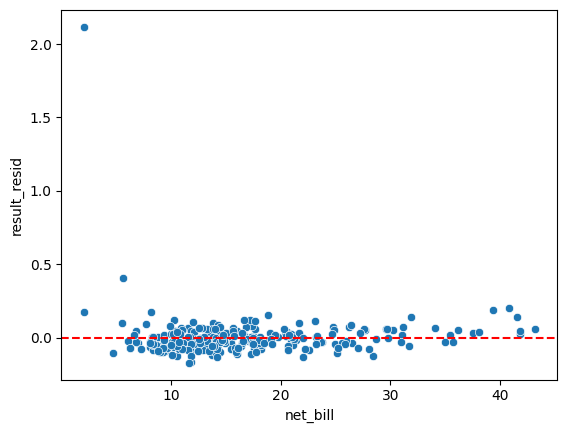

In [23]:
sns.scatterplot(x = 'net_bill', y = 'result_resid', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [24]:
results = smf.ols('''
                    tip_pct ~       size
                                + smoker
                                + np.log(net_bill)
                  ''', tips).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     27.04
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           4.20e-15
Time:                        17:30:00   Log-Likelihood:                 131.85
No. Observations:                 244   AIC:                            -255.7
Df Residuals:                     240   BIC:                            -241.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6716      0.055     12.246      0.000       0.564       0.780
smoker[T.No]        -0.0451      0.019     -2.360      0.019      -0.083      -0.007
size                 0.0434      0.012      3.669      0.000       0.020       0.067
np.log(net_bill)    -0.2040      0.023     -8.742      0.000      -0.250      -0.158
==============================================================================
Omnibus:                      425.565   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           144265.545
Skew:                           9.203   Prob(JB):                         0.00
Kurtosis:                     120.691   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
results = smf.ols('''
                    tip_pct ~       size
                                + smoker
                                + np.power(net_bill,2)
                  ''', tips).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     5.684
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           0.000892
Time:                        17:30:38   Log-Likelihood:                 104.70
No. Observations:                 244   AIC:                            -201.4
Df Residuals:                     240   BIC:                            -187.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2438      0.031      7.858      0.000       0.183       0.305
smoker[T.No]             -0.0396      0.022     -1.827      0.069      -0.082       0.003
size                      0.0105      0.013      0.804      0.422      -0.015       0.036
np.power(net_bill, 2)    -0.0001    3.5e-05     -3.644      0.000      -0.000   -5.86e-05
==============================================================================
Omnibus:                      468.300   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           233366.421
Skew:                          11.087   Prob(JB):                         0.00
Kurtosis:                     152.875   Cond. No.                     1.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O primeiro modelo

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [26]:
df = pd.read_csv('previsao_de_renda.csv')

In [27]:
reg = smf.ols('renda ~ tempo_emprego', data = df).fit()
df['res'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:33:50   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

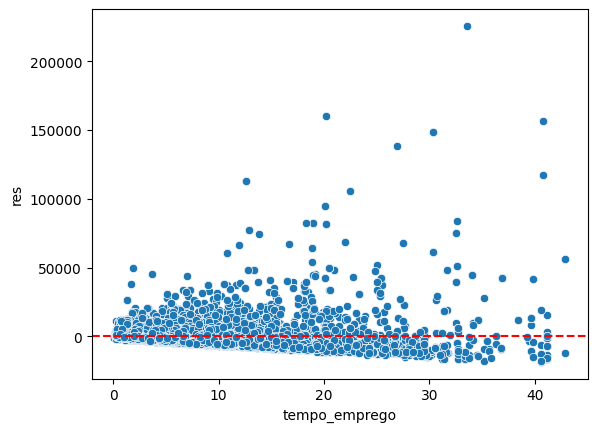

In [28]:
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

In [29]:
results = smf.ols('''
                    renda ~ 
                                sexo                
                                + posse_de_veiculo     
                                + posse_de_imovel      
                                + qtd_filhos           
                                + tipo_renda           
                                + educacao             
                                + estado_civil         
                                + tipo_residencia      
                                + idade                
                                + tempo_emprego        
                                + qt_pessoas_residencia
                  ''', df).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:36:38   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5626.6247   2500.235     -2.250      0.024   -1.05e+04    -725.776
sexo[T.M]                         6052.8592    155.859     38.836      0.000    5747.352    6358.367
posse_de_veiculo[T.True]            48.9098    150.374      0.325      0.745    -245.846     343.666
posse_de_imovel[T.True]            366.5747    148.723      2.465      0.014      75.054     658.095
tipo_renda[T.Bolsista]           -1357.7175   2564.833     -0.529      0.597   -6385.188    3669.753
tipo_renda[T.Empresário]           823.1460    158.826      5.183      0.000     511.822    1134.470
tipo_renda[T.Pensionista]        -2682.6331   2565.489     -1.046      0.296   -7711.391    2346.125
tipo_renda[T.Servidor público]     137.0942    236.327      0.580      0.562    -326.143     600.332
educacao[T.Pós graduação]         1090.5064   1690.396      0.645      0.519   -2222.932    4403.945
educacao[T.Secundário]             607.3280    765.686      0.793      0.428    -893.536    2108.192
educacao[T.Superior completo]     1225.5587    768.564      1.595      0.111    -280.947    2732.064
educacao[T.Superior incompleto]    220.4722    827.097      0.267      0.790   -1400.767    1841.712
estado_civil[T.Separado]          1161.1096   1182.969      0.982      0.326   -1157.693    3479.912
estado_civil[T.Solteiro]           819.9016   1158.206      0.708      0.479   -1450.362    3090.165
estado_civil[T.União]             -475.3334    267.717     -1.776      0.076   -1000.101      49.434
estado_civil[T.Viúvo]             1053.5626   1229.396      0.857      0.391   -1356.245    3463.370
tipo_residencia[T.Casa]           -298.3088    575.821     -0.518      0.604   -1427.008     830.390
tipo_residencia[T.Com os pais]    -388.7990    641.844     -0.606      0.545   -1646.914     869.316
tipo_residencia[T.Comunitário]    -459.8284   1120.521     -0.410      0.682   -2656.224    1736.567
tipo_residencia[T.Estúdio]          77.2381   1056.186      0.073      0.942   -1993.051    2147.527
tipo_residencia[T.Governamental]    73.8042    701.702      0.105      0.916   -1301.641    1449.249
qtd_filhos                       -1126.6107   1147.916     -0.981      0.326   -3376.703    1123.482
idade                               42.0025      8.517      4.931      0.000      25.307      58.698
tempo_emprego                      554.7551     11.044     50.230      0.000     533.107     576.404
qt_pessoas_residencia             1269.8493   1145.868      1.108      0.268    -976.229    3515.928
==============================================================================
Omnibus:                    17568.773   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9884998.164
Skew:             

In [32]:
results = smf.ols('''
                    renda ~ 
                                sexo                
                                + posse_de_veiculo     
                                + posse_de_imovel               
                                + tipo_renda                      
                                + estado_civil              
                                + idade                
                                + tempo_emprego        
                  ''', df).fit()

results.summary()
df['res'] = results.resid

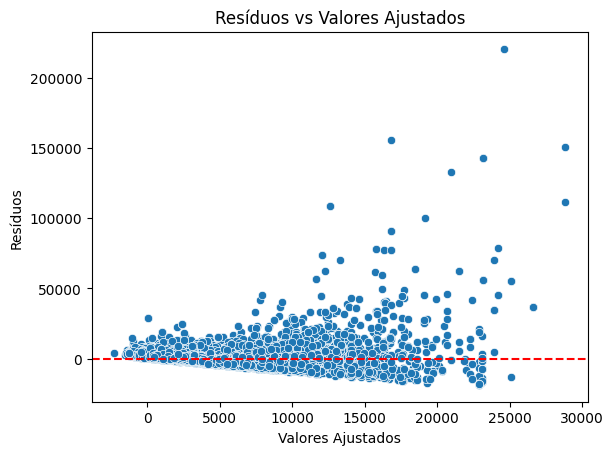

In [34]:
fitted_values = results.fittedvalues
sns.scatterplot(x=fitted_values, y=df['res'])
plt.axhline(0, color='r', linestyle='--')
plt.title('Resíduos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()